# Analisis dan Visualisasi Data dengan Decision Tree

**Import Library**

Langkah pertama adalah mengimpor semua library Python yang dibutuhkan. Ini termasuk pandas dan numpy untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta modul dari scikit-learn untuk membangun dan mengevaluasi model machine learning.

In [2]:
# Step 1: Import Library dan Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


___

**Load data**

Setelah itu, dataset mobile_sales_data.csv dibaca menggunakan pandas.read_csv() dan ditampilkan sebagian agar kita bisa melihat struktur awal data.

In [3]:
# Load dataset
df = pd.read_csv("mobile_sales_data.csv")
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


**Membuat Kolom Target ‘*High Sales*’**
Di langkah ini, kita menentukan variabel target (apa yang ingin kita prediksi). Karena kita ingin membangun model klasifikasi, kita membuat kolom baru bernama High_Sales dengan nilai 1 jika produk terjual sebanyak 3 unit atau lebih, dan 0 jika kurang dari itu. Ini mengubah masalah menjadi klasifikasi biner: terjual tinggi atau tidak.

In [4]:
# Step 2: Buat Kolom Target 'High Sales'
# Target: 1 jika Quantity Sold >= 3, else 0
df['High_Sales'] = (df['Quantity Sold'] >= 3).astype(int)

**Memilih dan Menyiapkan Fitur-Fitur yang Relevan**

Langkah ini fokus pada memilih fitur (variabel input) yang memiliki hubungan dengan penjualan. Fitur yang dipilih adalah Brand, Product, Price, RAM, ROM, dan SSD. Beberapa kolom seperti RAM dan penyimpanan (ROM, SSD) memiliki satuan seperti “GB” atau “TB”, jadi kita membersihkan nilainya dan mengubahnya menjadi angka agar bisa digunakan dalam model. Kemudian, fitur kategorikal seperti Brand dan Product diubah menjadi angka menggunakan Label Encoding, karena algoritma machine learning tidak bisa bekerja langsung dengan data berupa teks.

In [5]:
# Step 3: Pilih Fitur-Fitur yang Relevan
selected_columns = ['Brand', 'Product', 'Price', 'RAM', 'ROM', 'SSD', 'High_Sales']
df_model = df[selected_columns].copy()

# Ganti satuan RAM, ROM, SSD ke angka (remove 'GB' or 'TB')
def convert_storage(val):
    if pd.isna(val):
        return 0
    val = str(val).upper().replace("GB", "").replace(" ", "")
    if "TB" in val:
        return float(val.replace("TB", "")) * 1024
    return float(val)

df_model['RAM'] = df_model['RAM'].apply(convert_storage)
df_model['ROM'] = df_model['ROM'].apply(convert_storage)
df_model['SSD'] = df_model['SSD'].apply(convert_storage)

# Label Encoding kolom kategorikal
label_cols = ['Brand', 'Product']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

df_model.head()

,Brand,Product,Price,RAM,ROM,SSD,High_Sales
0,9,1,78570,12.0,128.0,0.0,1
1,12,0,44613,8.0,512.0,256.0,0
2,15,1,159826,8.0,256.0,0.0,1
3,16,0,20911,12.0,64.0,2048.0,0
4,8,0,69832,8.0,128.0,2048.0,1


___
**Memisahkan Fitur dan Target**

Setelah data siap, kita memisahkan kolom input (fitur) dan target (High_Sales). Fitur disimpan di variabel X, dan target disimpan di variabel y. Ini adalah standar untuk training model di scikit-learn.

In [6]:
# Step 4: Pisahkan Fitur dan Target
X = df_model.drop("High_Sales", axis=1)
y = df_model["High_Sales"]

**Split Data (Training dan Testing)**

Sebelum melatih model, kita perlu membagi data menjadi dua bagian: data latih (training) dan data uji (testing). Model dilatih pada data training dan kemudian dievaluasi menggunakan data testing untuk melihat performa pada data baru. Dalam kasus ini, 30% dari data digunakan untuk testing, dan sisanya untuk training.



In [7]:
# Step 5: Split Data (Training & Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

___
**Membangun Model Decision Tree**

Di langkah ini, kita membuat model klasifikasi menggunakan algoritma Decision Tree dari scikit-learn. Kita mengatur max_depth=4 agar pohon keputusan tidak terlalu dalam, yang dapat membantu menghindari overfitting. Model kemudian dilatih menggunakan X_train dan y_train.

In [8]:
# Step 6: Buat Model Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

___
**Evaluasi Model**

Setelah model dilatih, kita melakukan prediksi pada data testing (X_test) dan membandingkannya dengan nilai sebenarnya (y_test). Kita menampilkan confusion matrix dan classification report yang menunjukkan metrik seperti precision, recall, dan akurasi dari model. Ini penting untuk memahami seberapa baik model bekerja dalam mengklasifikasi data.



In [9]:
# Step 7: Evaluasi Model
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[    1  2976]
 [   10 12013]]

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.00      0.00      2977
           1       0.80      1.00      0.89     12023

    accuracy                           0.80     15000
   macro avg       0.45      0.50      0.45     15000
weighted avg       0.66      0.80      0.71     15000



**Visualisasi Decision Tree**

Terakhir, kita memvisualisasikan struktur pohon keputusan menggunakan plot_tree() dari sklearn. Visualisasi ini memperlihatkan bagaimana model mengambil keputusan berdasarkan fitur-fitur input. Setiap cabang menunjukkan kondisi pengambilan keputusan, dan setiap daun menunjukkan hasil prediksi model (High atau Low sales).



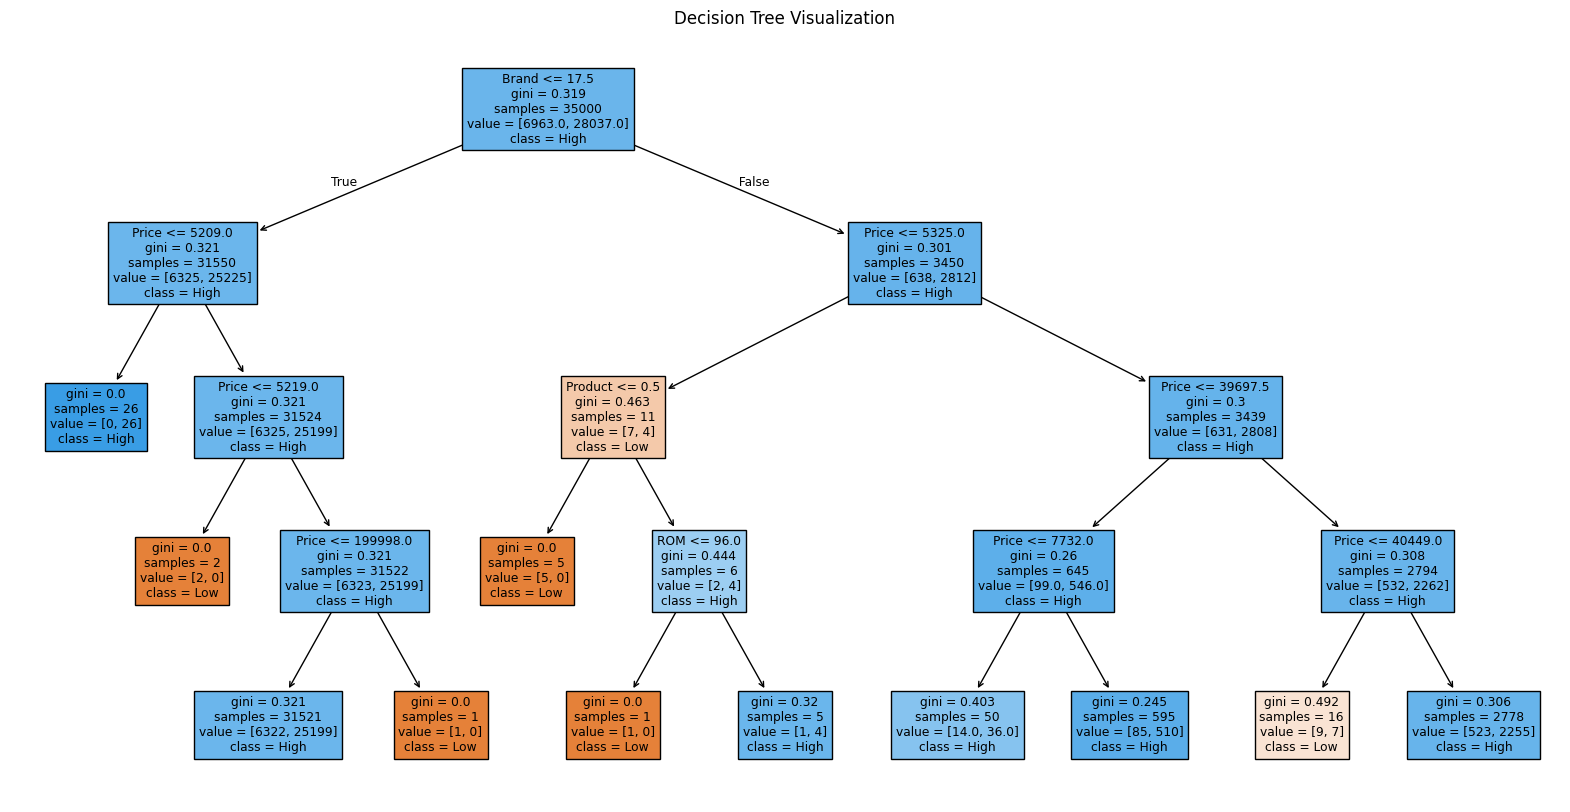

In [10]:
# Step 8: Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()